In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
%matplotlib inline

# sklearn
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

# Classifier Libraries
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# model selection and evaluation
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import learning_curve
from sklearn.model_selection import cross_val_score

import warnings
warnings.filterwarnings('ignore')

# Visualization
import seaborn as sns
sns.set(style="dark")

In [2]:
cc='/kaggle/input/creditcardfraud/creditcard.csv'

df = pd.read_csv(cc)

In [3]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [5]:
print(" ###### Info ######")
print(df.info())

print(" ###### Null Checks ######")
print(df.isna().sum())

 ###### Info ######
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  flo

#### As part of EDA, lets check for Class Imbalance

In [6]:
df.Class.value_counts()

0    284315
1       492
Name: Class, dtype: int64

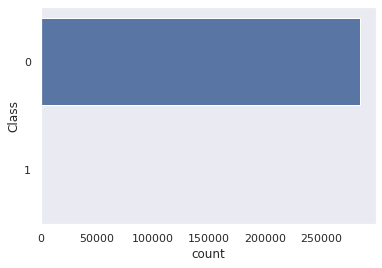

In [7]:
sns.countplot(y='Class', data=df)

### Implication of Class Imbalance

If we start working with the original data frame, which has a huge Class Imbalance will have multiple implications:

1. The huge skew will make model overfit to a single class i.e. Non-Fraud Class.
2. The model will not be sufficiently trained on the primary use case of detecting Fraud.
3. Since the data is already processed by PCA, it will be difficult to correlate the features which is contributing to Fraud class.

We will have to choose the train/test split wisely.

#### Scaling

From the above describe call, we could see that Time and Amount are not scaled, hence could have adverse effect on out model. Let's fix that too:

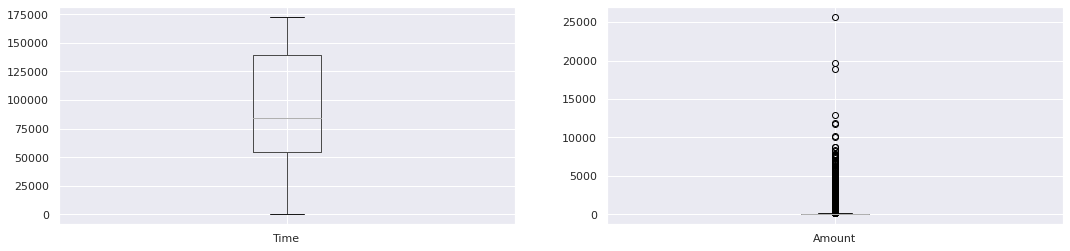

In [8]:
fig, ax = plt.subplots(1, 2, figsize=(18,4))
df.boxplot('Time', ax=ax[0])
df.boxplot('Amount', ax=ax[1])

My usual preference for linear scaling is to look at StandardScalar or MaxMinScalar, in most cases, they work pretty well. However, per the above graph we have got quite a few outliers and both Scalars are pretty sensitive to outliers. Hence I would suggest using RobustScalar instead.

In [9]:
rr_scalar = RobustScaler()

df['scaled_amt'] = rr_scalar.fit_transform(df['Amount'].values.reshape(-1,1))
df['scaled_time'] = rr_scalar.fit_transform(df['Time'].values.reshape(-1,1))

# Drop Original columns
df.drop(['Amount', 'Time'], axis=1, inplace=True)
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Class,scaled_amt,scaled_time
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,1.783274,-0.994983
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.269825,-0.994983
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,4.983721,-0.994972
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,1.418291,-0.994972
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,0.670579,-0.994960


### Construct X and Y 

In [10]:
X = df.drop('Class', axis=1) # this creates a copy, since inplace attributes is not provided
y = df['Class']

test_df = df[df.Class==1][:92]
test_df

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Class,scaled_amt,scaled_time
541,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,-2.772272,...,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,1,-0.307413,-0.990214
623,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,-0.838587,...,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,1,7.084469,-0.989438
4920,-2.303350,1.759247,-0.359745,2.330243,-0.821628,-0.075788,0.562320,-0.399147,-0.238253,-1.525412,...,-0.932391,0.172726,-0.087330,-0.156114,-0.542628,0.039566,-0.153029,1,3.045204,-0.942563
6108,-4.397974,1.358367,-2.592844,2.679787,-1.128131,-1.706536,-3.496197,-0.248778,-0.247768,-4.801637,...,0.176968,-0.436207,-0.053502,0.252405,-0.657488,-0.827136,0.849573,1,0.517013,-0.912910
6329,1.234235,3.019740,-4.304597,4.732795,3.624201,-1.357746,1.713445,-0.496358,-1.282858,-2.447469,...,-0.704181,-0.656805,-1.632653,1.488901,0.566797,-0.010016,0.146793,1,-0.293440,-0.906648
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23422,-2.179135,0.020218,-2.182733,2.572046,-3.663733,0.081568,0.268049,0.660437,-2.374027,-3.582810,...,0.299614,1.656800,0.328433,0.106457,0.691775,0.196779,0.241085,1,9.713547,-0.610287
26802,0.539276,1.554890,-2.066180,3.241617,0.184736,0.028330,-1.515521,0.537035,-1.999846,-2.133176,...,0.111955,-0.305225,-1.053835,0.771175,0.240878,0.418435,0.232170,1,-0.041640,-0.592535
27362,1.081234,0.416414,0.862919,2.520863,-0.005021,0.563341,-0.123372,0.223122,-0.673598,0.644550,...,-0.305154,0.053620,0.011761,0.375146,-0.106299,0.021008,0.010559,1,-0.286173,-0.589422
27627,0.333499,1.699873,-2.596561,3.643945,-0.585068,-0.654659,-2.275789,0.675229,-2.042416,-2.834871,...,-0.144363,-0.317981,-0.769644,0.807855,0.228164,0.551002,0.305473,1,-0.042479,-0.588094


### Lets try building our first and simple model with LogisticRegression

We are not going to do anything special here. Let's see how LogisticRegression performs out-of-the-box. Also, before we move ahead, we will also peek a little with our train/test split to understand how splits worked.


In [11]:
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.2, random_state=2)

test_y_vals, test_y_counts = np.unique(test_y, return_counts=True)
print(test_y_counts/len(test_y))
train_y_vals, train_y_counts = np.unique(train_y, return_counts=True)
print(train_y_counts/len(train_y))

[0.99852533 0.00147467]
[0.99820931 0.00179069]


As you see above our both classes are not balanced, making the model to overfit on non-fraud case which probably is not our positive case. Nevertheless, lets go ahead and try the model

In [12]:
model_logr = LogisticRegression()

model_logr.fit(train_X, train_y)
result = model_logr.score(test_X, test_y)
print("Accuracy: %.2f%%" % (result*100.0))

Accuracy: 99.95%


In [13]:
y_pred = model_logr.predict(test_X)

### Confusion Matrix 
Confusion Matrix helps us understand True Positive, False Positive, True Negative and False Negative errors. Usually, we could look at these false classification to better understand why the model has classified something wrong.

In [14]:
from sklearn.metrics import confusion_matrix

confusion_matrix(test_y, y_pred)

array([[56871,     7],
       [   24,    60]])

### Learning Curves 

Lets look at the Learning Curve, this is out first and basic model, hence the guess would be the learning curve will not be converging.

In [15]:
def plot_learning_curve(estimator, title, X, y, train_sizes=np.linspace(.1, 1.0, 5)):
    _, axes = plt.subplots(1, 3, figsize=(20, 5))
    axes[0].set_xlabel("Training examples")
    axes[0].set_ylabel("Score")

    train_sizes, train_scores, test_scores, fit_times, _ = \
        learning_curve(estimator, X, y,
                       train_sizes=train_sizes,
                       return_times=True)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    fit_times_mean = np.mean(fit_times, axis=1)
    fit_times_std = np.std(fit_times, axis=1)

    # Plot learning curve
    axes[0].grid()
    axes[0].fill_between(train_sizes, train_scores_mean - train_scores_std,
                         train_scores_mean + train_scores_std, alpha=0.1,
                         color="r")
    axes[0].fill_between(train_sizes, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1,
                         color="g")
    axes[0].plot(train_sizes, train_scores_mean, 'o-', color="r",
                 label="Training score")
    axes[0].plot(train_sizes, test_scores_mean, 'o-', color="g",
                 label="Cross-validation score")
    axes[0].legend(loc="best")

    # Plot n_samples vs fit_times
    axes[1].grid()
    axes[1].plot(train_sizes, fit_times_mean, 'o-')
    axes[1].fill_between(train_sizes, fit_times_mean - fit_times_std,
                         fit_times_mean + fit_times_std, alpha=0.1)
    axes[1].set_xlabel("Training examples")
    axes[1].set_ylabel("fit_times")
    axes[1].set_title("Scalability of the model")

    # Plot fit_time vs score
    axes[2].grid()
    axes[2].plot(fit_times_mean, test_scores_mean, 'o-')
    axes[2].fill_between(fit_times_mean, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1)
    axes[2].set_xlabel("fit_times")
    axes[2].set_ylabel("Score")
    axes[2].set_title("Performance of the model")

    return plt


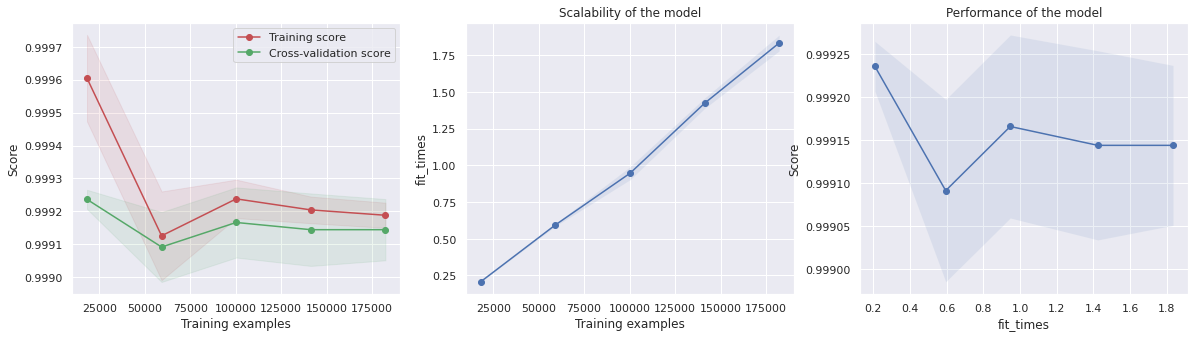

In [16]:
plot_learning_curve(model_logr, "LogisticRegression Learning Curve", train_X, train_y)
plt.show()

As you can see, the model is not really converging well. 

### Working with Imbalanced Classes

As we see 99% of our training data is actually non-fraud classes, hence the model will have a tendency to overfit towards non-fraud classes. To reduce the variance while predicting the Fraud class, we should balance the classes. 

The data looks like 
* Non-Fraud (Class 0) = 284315
* Fraud (Class 1) = 492

Here is the strategy:
* We will take an equal split of from both Classes.
* Given we would need some Test set, so we will implement a hold-out strategy, holding 20% for testing. 
* Shuffle the data so that so are taking negative class randomly.
* Our data set would look like:
> 
Total # of Fraud : 492
Hold-out : ~20% (98) 
number of Fraud Classes = 492 - 98 = 394

> 
Total # of non-fraud : 284315
Hold-out : 98 
number of Non-fraud classes : 394 (after shuffle the data)


In [17]:
# shuffle the full dataset
sdf = df.sample(frac=1, random_state=45)
fraud_df = sdf.loc[sdf['Class'] == 1]
non_fraud_df = sdf.loc[sdf['Class'] == 0][:492]

print("Fraud df = ", len(fraud_df))
print("Non Fraud df = ", len(non_fraud_df))

# shuffle the rows 
sampled_df = pd.concat([fraud_df, non_fraud_df]).sample(frac=1, random_state=24)
sampled_df.reset_index(inplace=True)
sampled_df.drop(['index'], axis=1, inplace=True)
sampled_df.head()


Fraud df =  492
Non Fraud df =  492


,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Class,scaled_amt,scaled_time
0,1.232604,-0.548931,1.087873,0.894082,-1.433055,-0.356797,-0.717492,0.003167,-0.100397,0.543187,...,-0.517568,0.012833,0.699217,0.527258,-0.322607,0.080805,0.035427,1,-0.033676,-0.191908
1,-0.563395,0.778818,0.913569,-0.536431,0.620167,-1.675101,1.656058,-0.941035,0.686978,0.820588,...,-0.016308,0.057775,0.947798,-0.911336,0.021093,0.116581,-0.207497,0,-0.074198,0.719087
2,-2.743560,-3.062963,1.205744,-3.190086,2.747143,-2.532228,-1.297166,0.253086,1.579991,-2.137911,...,0.932026,0.222679,-0.439277,0.550182,-0.910338,0.028833,0.176723,0,0.592049,0.669416
3,1.341004,-0.567411,0.143747,-0.699747,-0.849122,-0.908594,-0.334088,-0.252647,-0.868423,0.602286,...,-0.154954,-0.060314,0.042096,0.448945,-0.324534,-0.010450,0.022157,0,0.579892,-0.073556
4,2.058348,-0.579800,-0.929198,-0.122881,-0.755643,-1.308080,-0.109370,-0.386558,-0.401298,0.672056,...,-1.031735,0.400216,0.336295,-0.293293,-0.609462,0.016075,-0.034442,0,0.193670,0.528401


In [18]:
sampled_df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Class,scaled_amt,scaled_time
0,1.232604,-0.548931,1.087873,0.894082,-1.433055,-0.356797,-0.717492,0.003167,-0.100397,0.543187,...,-0.517568,0.012833,0.699217,0.527258,-0.322607,0.080805,0.035427,1,-0.033676,-0.191908
1,-0.563395,0.778818,0.913569,-0.536431,0.620167,-1.675101,1.656058,-0.941035,0.686978,0.820588,...,-0.016308,0.057775,0.947798,-0.911336,0.021093,0.116581,-0.207497,0,-0.074198,0.719087
2,-2.743560,-3.062963,1.205744,-3.190086,2.747143,-2.532228,-1.297166,0.253086,1.579991,-2.137911,...,0.932026,0.222679,-0.439277,0.550182,-0.910338,0.028833,0.176723,0,0.592049,0.669416
3,1.341004,-0.567411,0.143747,-0.699747,-0.849122,-0.908594,-0.334088,-0.252647,-0.868423,0.602286,...,-0.154954,-0.060314,0.042096,0.448945,-0.324534,-0.010450,0.022157,0,0.579892,-0.073556
4,2.058348,-0.579800,-0.929198,-0.122881,-0.755643,-1.308080,-0.109370,-0.386558,-0.401298,0.672056,...,-1.031735,0.400216,0.336295,-0.293293,-0.609462,0.016075,-0.034442,0,0.193670,0.528401


In [19]:
sampled_X = sampled_df.drop('Class', axis=1)
sampled_y = sampled_df['Class']

sampled_X = sampled_X.values
sampled_y = sampled_y.values.reshape(-1,1)
print("Sampled X", sampled_X.shape)
print("Sampled y", sampled_y.shape)


train_sX, test_sX, train_sy, test_sy = train_test_split(sampled_X, sampled_y, test_size=0.2, random_state=20)

test_sy_vals, test_sy_counts = np.unique(test_sy, return_counts=True)
print(test_y_counts/len(test_sy))
train_sy_vals, train_sy_counts = np.unique(train_sy, return_counts=True)
print(train_sy_counts/len(train_sy))


Sampled X (984, 30)
Sampled y (984, 1)
[288.72081218   0.42639594]
[0.49809403 0.50190597]


### Model Selection 

Let's train 4 classifier models and we will pick the model with best accuracy.

In [20]:
classifiers = {
    "LogisiticRegression": LogisticRegression(),
    "KNN Classifier": KNeighborsClassifier(),
    "Support Vector Classifier": SVC(),
    "DecisionTreeClassifier": DecisionTreeClassifier()
}

In [21]:
cv_scores = {}
for k, model in classifiers.items():
    scores = cross_val_score(model, train_sX, train_sy, cv=5)
    cv_scores[k] = round(scores.mean() * 100, 2)
    print("Model: ", k, " Accuracy: ", cv_scores[k])

Model:  LogisiticRegression  Accuracy:  93.64
Model:  KNN Classifier  Accuracy:  93.77
Model:  Support Vector Classifier  Accuracy:  93.77
Model:  DecisionTreeClassifier  Accuracy:  90.47


### Parameter Tuning

Now that we have compared the models, lets move forward with Parameter tuning for these models. I will pick ```LogisticRegression```, ```KNeighborsClassifier``` and ```SVC``` classifiers.

In [22]:
# Logistic Regression best estimator
lr_params = {"penalty": ['l1', 'l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}
grid_cv_lr = GridSearchCV(LogisticRegression(), lr_params)
grid_cv_lr.fit(train_sX, train_sy)
model_log_reg = grid_cv_lr.best_estimator_

# KNN  
knn_params = {"n_neighbors": list(range(2,5,1)), 'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']}
grid_knn = GridSearchCV(KNeighborsClassifier(), knn_params)
grid_knn.fit(train_sX, train_sy)
model_knn = grid_knn.best_estimator_

# SVC best estimator
svc_params = {'C': [0.5, 0.7, 0.9, 1], 'kernel': ['rbf', 'poly', 'sigmoid', 'linear']}
grid_svc = GridSearchCV(SVC(), svc_params)
grid_svc.fit(train_sX, train_sy)
model_svc = grid_svc.best_estimator_

In [23]:
best_classifiers = {
    "LogisiticRegression": model_log_reg,
    "KNN Classifier": model_knn,
    "Support Vector Classifier": model_svc
}

best_cv_scores = {}
for k, model in best_classifiers.items():
    scores = cross_val_score(model, train_sX, train_sy, cv=5)
    best_cv_scores[k] = round(scores.mean() * 100, 2)
    print("Model: ", k, " Accuracy: ", best_cv_scores[k])

Model:  LogisiticRegression  Accuracy:  94.53
Model:  KNN Classifier  Accuracy:  93.39
Model:  Support Vector Classifier  Accuracy:  93.77


### Model Evaluation

In [24]:
result = model_log_reg.score(test_sX, test_sy)
print("Accuracy: %.2f%%" % (result*100.0))

result = model_knn.score(test_sX, test_sy)
print("Accuracy: %.2f%%" % (result*100.0))

result = model_svc.score(test_sX, test_sy)
print("Accuracy: %.2f%%" % (result*100.0))

Accuracy: 92.89%
Accuracy: 89.85%
Accuracy: 89.85%


In [25]:
result = model_log_reg.score(test_X, test_y)
print("Accuracy: %.2f%%" % (result*100.0))

Accuracy: 97.26%


Model performs quite well with given the unersampling techniques we used to train the model. 

### Next Steps:

we have tried traditional classification models, as we see these work really well, but nothing is perfect, we are going to try few more things with this:
* Look AUC ROC curves to see to see if it better fit. 
* Try anomaly detection models, Like IsolationForest.
* Try CNN with TensorFlow.